In [18]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Download 1-year historical adjusted close prices
ticker = 'AAPL'
data = yf.download(ticker, period='1y', interval='1d')
prices = data[('Close', 'AAPL')]

C:\Users\yinsiyuan\AppData\Local\Temp\ipykernel_18572\2187069595.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period='1y', interval='1d')
[*********************100%***********************]  1 of 1 completed


In [8]:
# Compute daily log returns
log_returns = np.log(prices / prices.shift(1)).dropna()

# Preview first 5 returns
log_returns.head()

Date
2025-01-16   -0.041239
2025-01-17    0.007507
2025-01-21   -0.032436
2025-01-22    0.005331
2025-01-23   -0.000760
Name: (Close, AAPL), dtype: float64

In [10]:
# Compute mean and standard deviation of daily log returns
mu = log_returns.mean()
sigma = log_returns.std()

In [13]:
# Set number of simulations
n_sim = 10000

# Generate simulated returns from normal distribution
simulated_returns = np.random.normal(mu, sigma, n_sim)

In [14]:
# 5% quantile (VaR)
VaR_5 = np.percentile(simulated_returns, 5)

# Expected Shortfall (average of worst 5% losses)
ES_5 = simulated_returns[simulated_returns <= VaR_5].mean()

#Display results
VaR_5, ES_5


(np.float64(-0.03269716132547395), np.float64(-0.04107739729143114))

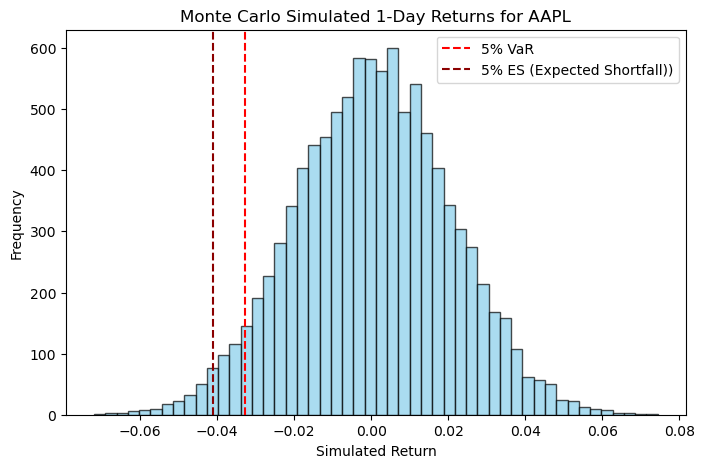

In [19]:
# Plot histogram of simulated returns
plt.figure(figsize=(8,5))
plt.hist(simulated_returns, bins=50, alpha=0.7, color='skyblue', edgecolor='black')

# Add vertical lines for VaR and ES
plt.axvline(VaR_5, color='red', linestyle='--', label='5% VaR')
plt.axvline(ES_5, color='darkred', linestyle='--', label='5% ES (Expected Shortfall))')

# Labels and title
plt.title('Monte Carlo Simulated 1-Day Returns for AAPL')
plt.xlabel('Simulated Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()